In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food_quality = ctrl.Antecedent(np.arange(0, 101, 1), "food_quality")
serve = ctrl.Antecedent(np.arange(0, 101, 1), "serve")
tip = ctrl.Consequent(np.arange(0, 26, 1), "tip")
food_quality["bad"] = fuzz.trimf(food_quality.universe, [0, 28, 55])
food_quality["fair"] = fuzz.trimf(food_quality.universe, [40, 63, 85])
food_quality["good"] = fuzz.trimf(food_quality.universe, [75, 88, 101])
serve["bad"] = fuzz.trimf(serve.universe, [0, 0, 50])
serve["fair"] = fuzz.trimf(serve.universe, [40, 60, 80])
serve["good"] = fuzz.trimf(serve.universe, [70, 85, 101])   
tip["low"] = fuzz.trimf(tip.universe, [0, 0, 13])
tip["mid"] = fuzz.trimf(tip.universe, [0, 13, 26])
tip["high"] = fuzz.trimf(tip.universe, [13, 26, 26])
rule1 = ctrl.Rule(serve["bad"] and food_quality["bad"]  , tip["low"])
rule2 = ctrl.Rule( food_quality["fair"] and serve["bad"], tip["low"])
rule3 = ctrl.Rule( food_quality["good"] and serve["bad"] , tip["mid"])
rule4 = ctrl.Rule(  food_quality["bad"] and serve["fair"],  tip["low"])
rule5 = ctrl.Rule(   food_quality["fair"] and serve["fair"] , tip["mid"])
rule6 = ctrl.Rule(  food_quality["good"] and serve["fair"] , tip["mid"])
rule7 = ctrl.Rule(  food_quality["bad"] and serve["good"] , tip["mid"])
rule8 = ctrl.Rule(  food_quality["fair"]and serve["good"] , tip["high"])
rule9 = ctrl.Rule(  food_quality["good"] and serve["good"]  , tip["high"])
tip_f = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipss= ctrl.ControlSystemSimulation(tip_f)
tipss.input["food_quality"] = int(input("Lütfen yemeğin kalitesini maximum 100 minimum 0 olacak şekilde puanlayın: "))
tipss.input["serve"] = int(input("Lütfen servis kalitesini maximum 100 minimum 0 olacak şekilde puanlayın: "))
Hesap= int(input("Ödenecek hesap tutarı: "))
tipss.compute()
print("Ödenecek bahşiş tutarı %",tipss.output["tip"])
print("Verilecek bahşiş tutarı: ", round(Hesap*round(tipss.output["tip"])/100)," TL")
tip.view(sim=tipss)



ModuleNotFoundError: No module named 'skfuzzy'

/home/SeneSatka/anaconda3/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Ödenecek Bahşiş Oranı: % 20.666666666666664
Ödenecek Bahşiş: 105  TL


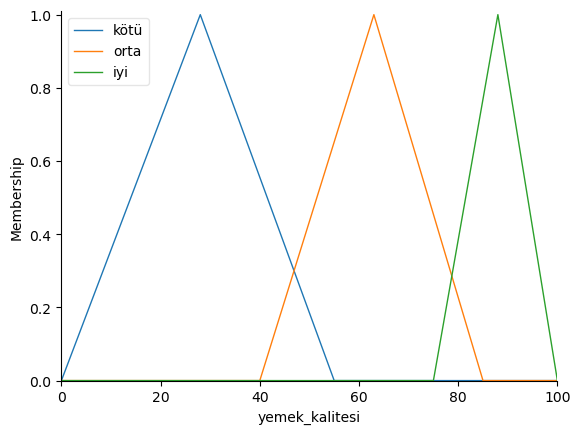

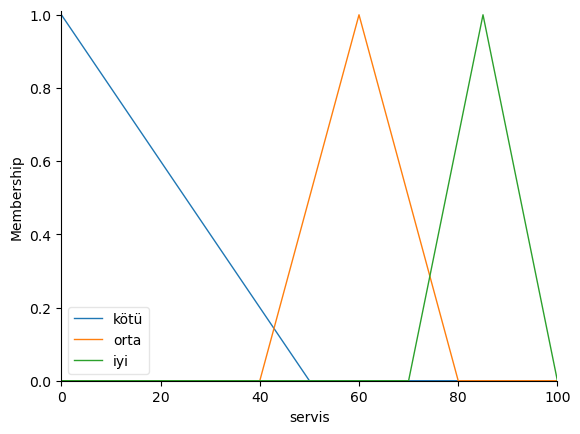

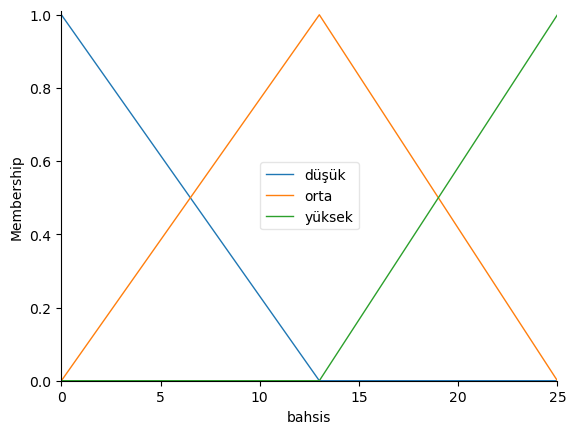

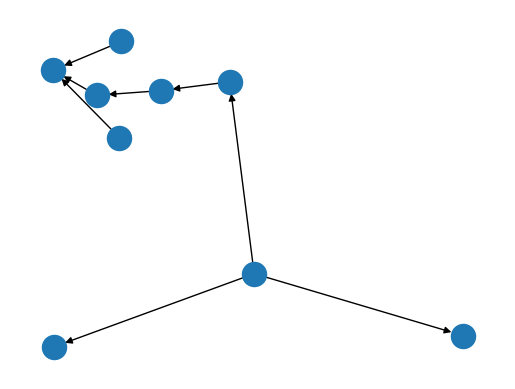

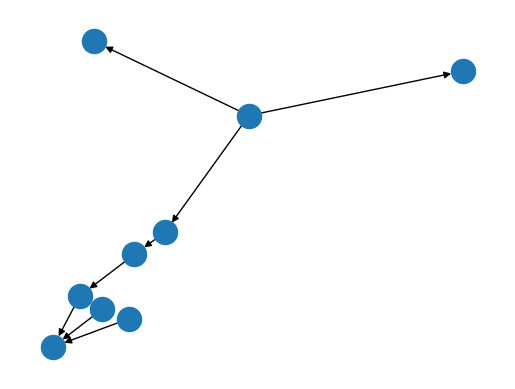

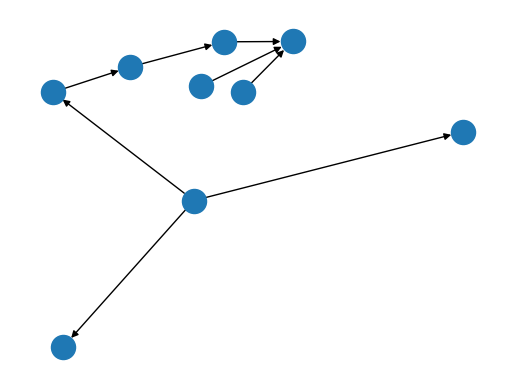

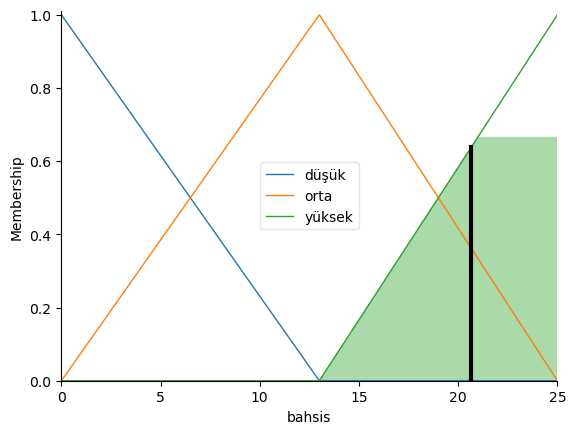

In [10]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as f
# Değerlerin aralıklarını belirlemek için
yemek_kalitesi = f.Antecedent(np.arange(0, 101, 1), 'yemek_kalitesi')
servis = f.Antecedent(np.arange(0, 101, 1), 'servis')
bahsis = f.Consequent(np.arange(0, 26, 1), 'bahsis')
#Yemek kalitesinin sözel ifadelerinin aralıklarını belirlemek için
yemek_kalitesi['kötü'] = fuzz.trimf(yemek_kalitesi.universe, [0, 28, 55])
yemek_kalitesi['orta'] = fuzz.trimf(yemek_kalitesi.universe, [40, 63, 85])
yemek_kalitesi['iyi'] = fuzz.trimf(yemek_kalitesi.universe, [75, 88, 100])
#Yemek kalitesinin sözel ifadelerinin grafiğini göstermek için
yemek_kalitesi.view()
#Servis kalitesinin sözel ifadelerinin aralıklarını belirlemek için
servis['kötü'] = fuzz.trimf(servis.universe, [0, 0, 50])
servis['orta'] = fuzz.trimf(servis.universe, [40, 60, 80])
servis['iyi'] = fuzz.trimf(servis.universe, [70, 85, 100])
#Servis kalitesinin sözel ifadelerinin grafiğini göstermek için
servis.view()
#Bahşiş oranının sözel ifadelerinin aralıklarını belirlemek için
bahsis['düşük'] = fuzz.trimf(bahsis.universe, [0, 0, 13])
bahsis['orta'] = fuzz.trimf(bahsis.universe, [0, 13, 25])
bahsis['yüksek'] = fuzz.trimf(bahsis.universe, [13, 25, 25])
#Bahşiş oranının sözel ifadelerinin grafiğini göstermek için
bahsis.view()
#Bahşiş oranını belirleyen kuralları koyuyoruz.
kural1 = f.Rule(yemek_kalitesi['kötü'] or servis['kötü'], bahsis['düşük'])
kural2 = f.Rule(servis['orta'], bahsis['orta'])
kural3 = f.Rule(servis['iyi'] or yemek_kalitesi['iyi'], bahsis['yüksek'])
#Kuralların grafik olarak gösterimi
kural1.view()
kural2.view()
kural3.view()
#kullara göre bulanık mantık kütüphanesindeki algoritmanın çalıştırılması
bahsis_f = f.ControlSystem([kural1, kural2, kural3])
bahsisleme= f.ControlSystemSimulation(bahsis_f)
#Kullanıcıdan değer girişi
bahsisleme.input['yemek_kalitesi'] = int(input("Lütfen yemek kalitesini 100 üzerinden puanlayınız:"))
bahsisleme.input['servis'] = int(input("Servis kalitesine 100 üzerinden kaç veriyorsun: "))
Hesap= int(input("Ödenecek hesap miktarını giriniz:"))
#bahşiş hesaplamasının yapılması
bahsisleme.compute()
#Hesaplanan bahşiş çıktısının ekrana yazılmasıprint

print("Ödenecek Bahşiş Oranı: %",bahsisleme.output['bahsis'])
print("Ödenecek Bahşiş:", round(Hesap*round(bahsisleme.output['bahsis'])/100)," TL")
#Hesaplanan bahşiş çıktısının grafikle gösterimi
bahsis.view(sim=bahsisleme)

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


food_quality = ctrl.Antecedent(np.arange(0, 101, 1), "food_quality")
serve = ctrl.Antecedent(np.arange(0, 101, 1), "serve")
tip = ctrl.Consequent(np.arange(0, 26, 1), "tip")


food_quality["bad"] = fuzz.trimf(food_quality.universe, [0, 28, 55])
food_quality["fair"] = fuzz.trimf(food_quality.universe, [40, 63, 85])
food_quality["good"] = fuzz.trimf(food_quality.universe, [75, 88, 100])


serve["bad"] = fuzz.trimf(serve.universe, [0, 0, 50])
serve["fair"] = fuzz.trimf(serve.universe, [40, 60, 80])
serve["good"] = fuzz.trimf(serve.universe, [70, 85, 100])
       
tip["low"] = fuzz.trimf(tip.universe, [0, 0, 13])
tip["mid"] = fuzz.trimf(tip.universe, [0, 13, 25])
tip["high"] = fuzz.trimf(tip.universe, [13, 25, 25])

foodRule1 = ctrl.Rule( food_quality["bad"] , tip["low"])
foodRule2 = ctrl.Rule( food_quality["fair"], tip["mid"])
foodRule3 = ctrl.Rule( food_quality["good"], tip["high"])

serveRule1 = ctrl.Rule( serve["bad"], tip["low"])
serveRule2 = ctrl.Rule( serve["fair"], tip["mid"])
serveRule3 = ctrl.Rule( serve["good"], tip["high"])

tip_food = ctrl.ControlSystem([foodRule1, foodRule2, foodRule3])
tips_food= ctrl.ControlSystemSimulation(tip_food)
tip_serve = ctrl.ControlSystem([serveRule1, serveRule2, serveRule3])
tips_serve= ctrl.ControlSystemSimulation(tip_serve)

tips_food.input["food_quality"] = int(input("Lütfen yemeğin kalitesini maximum 100 minimum 0 olacak şekilde puanlayın: "))
tips_serve.input["serve"] = int(input("Lütfen servis kalitesini maximum 100 minimum 0 olacak şekilde puanlayın: "))
Hesap= int(input("Ödenecek hesap tutarı: "))

tips_food.compute()
tips_serve.compute()

print("Ödenecek bahşiş tutarı %",(tips_food.output["tip"]+tips_serve.output["tip"])/2)
print("Verilecek bahşiş tutarı: ", (round(Hesap*round(tips_food.output["tip"])/100)+round(Hesap*round(tips_serve.output["tip"])/100))/2,"TL")
#tip.view(sim=tipss)



ModuleNotFoundError: No module named 'skfuzzy'